### Introduction
<p style="text-align:justify">
Lending Club is a peer to peer marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. </p>

### Lending Process
<p style="text-align:justify">

Each borrowers fills out an application with details like financial history, purpose of loan, etc. Lending Club tries to verify all the information before putting it up on the their marketplace, but isn't always successful. Therefore, it is recommended that individual investors do their own research before investing.  </p>

### Some questions to think about!
<p style="text-align:justify">
Let us assume that we are a conservative investor looking to invest on the platform and wants to perform his own analysis. <br>
Which loans should we invest in, so that I lose minimum amount of money? <br> </p>

<hr>
### Acquiring the Data


<p style="text-align:justify">
Lending Club releases data for all of the approved and declined loan applications periodically on their <a href="https://www.lendingclub.com/info/download-data.action">website</a>. You can select a few different year ranges to download the datasets (in CSV format) for both approved and declined loans. </p>

<p style="text-align:justify">
We have downloaded - <br>
1. Loan data from 2007-2011 (approx. 9.3 MB): LoanStats3a.csv. 
2. Data dictionary (an explanation of data fields): LCDataDictionary.xlsx 

### Exploring the data

In [1]:
loan_stats <- read.csv('LoanStats3a.csv')
head(loan_stats)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
,NA,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NA,NA,Cash,N,,,,NA,NA,NA
,NA,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NA,NA,Cash,N,,,,NA,NA,NA
,NA,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NA,NA,Cash,N,,,,NA,NA,NA
,NA,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NA,NA,Cash,N,,,,NA,NA,NA
,NA,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NA,NA,Cash,N,,,,NA,NA,NA
,NA,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,NA,NA,Cash,N,,,,NA,NA,NA


In [2]:
library(xlsx)
description_full <- read.xlsx("LCDataDictionary.xlsx", sheetName = "LoanStats")
description <- subset(description_full, select=c('LoanStatNew','Description'))
head(description)

Loading required package: rJava
Loading required package: xlsxjars


LoanStatNew,Description
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration


In [3]:
dim(loan_stats)

[1] 42538   145

#### The dataset has 145 variables and 42,538 observations


### Cleaning the data

Removing columns with more than 50% of NA values.

In [4]:
select = rep(TRUE, ncol(loan_stats))
max_na_allowed =  0.5*nrow(loan_stats)

for(i in 1:ncol(loan_stats)){
    if (sum(is.na(loan_stats[i])) > max_na_allowed){
        select[i] = FALSE
    }
}

print('Removed columns:')
names(loan_stats)[!select]
loan_stats <- loan_stats[select]

[1] "Removed columns:"


[1] "member_id"                                 
 [2] "url"                                       
 [3] "mths_since_last_delinq"                    
 [4] "mths_since_last_record"                    
 [5] "mths_since_last_major_derog"               
 [6] "annual_inc_joint"                          
 [7] "dti_joint"                                 
 [8] "verification_status_joint"                 
 [9] "tot_coll_amt"                              
[10] "tot_cur_bal"                               
[11] "open_acc_6m"                               
[12] "open_act_il"                               
[13] "open_il_12m"                               
[14] "open_il_24m"                               
[15] "mths_since_rcnt_il"                        
[16] "total_bal_il"                              
[17] "il_util"                                   
[18] "open_rv_12m"                               
[19] "open_rv_24m"                               
[20] "max_bal_bc"                                
[21] "all_util"                                  
[22] "total_rev_hi_lim"                          
[23] "inq_fi"                                    
[24] "total_cu_tl"                               
[25] "inq_last_12m"                              
[26] "acc_open_past_24mths"                      
[27] "avg_cur_bal"                               
[28] "bc_open_to_buy"                            
[29] "bc_util"                                   
[30] "mo_sin_old_il_acct"                        
[31] "mo_sin_old_rev_tl_op"                      
[32] "mo_sin_rcnt_rev_tl_op"                     
[33] "mo_sin_rcnt_tl"                            
[34] "mort_acc"                                  
[35] "mths_since_recent_bc"                      
[36] "mths_since_recent_bc_dlq"                  
[37] "mths_since_recent_inq"                     
[38] "mths_since_recent_revol_delinq"            
[39] "num_accts_ever_120_pd"                     
[40] "num_actv_bc_tl"                            
[41] "num_actv_rev_tl"                           
[42] "num_bc_sats"                               
[43] "num_bc_tl"                                 
[44] "num_il_tl"                                 
[45] "num_op_rev_tl"                             
[46] "num_rev_accts"                             
[47] "num_rev_tl_bal_gt_0"                       
[48] "num_sats"                                  
[49] "num_tl_120dpd_2m"                          
[50] "num_tl_30dpd"                              
[51] "num_tl_90g_dpd_24m"                        
[52] "num_tl_op_past_12m"                        
[53] "pct_tl_nvr_dlq"                            
[54] "percent_bc_gt_75"                          
[55] "tot_hi_cred_lim"                           
[56] "total_bal_ex_mort"                         
[57] "total_bc_limit"                            
[58] "total_il_high_credit_limit"                
[59] "revol_bal_joint"                           
[60] "sec_app_earliest_cr_line"                  
[61] "sec_app_inq_last_6mths"                    
[62] "sec_app_mort_acc"                          
[63] "sec_app_open_acc"                          
[64] "sec_app_revol_util"                        
[65] "sec_app_open_act_il"                       
[66] "sec_app_num_rev_accts"                     
[67] "sec_app_chargeoff_within_12_mths"          
[68] "sec_app_collections_12_mths_ex_med"        
[69] "sec_app_mths_since_last_major_derog"       
[70] "hardship_type"                             
[71] "hardship_reason"                           
[72] "hardship_status"                           
[73] "deferral_term"                             
[74] "hardship_amount"                           
[75] "hardship_start_date"                       
[76] "hardship_end_date"                         
[77] "payment_plan_start_date"                   
[78] "hardship_length"                           
[79] "hardship_dpd"                              
[80] "hardship_loan_status"                      
[

#### Other cleaning processes required:

Removing irrelevant columns - <br>
1. desc: Description for each loan. <br>
2. id: Loan ID. <br>

Removing columns that may need more data to be useful - <br>
1. emp_title: The job title supplied by the Borrower when applying for the loan.

Removing redundant columns- <br>
1. grade: LC assigned loan grade [redundant information as the interest rate column (int_rate)] <br>
2. sub_grade:  LC assigned loan subgrade [redundant information as the interest rate column (int_rate)] <br>
3. zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application. [redundant with the (addr_state) column since only the first 3 digits of the 5 digit zip code are visible] 

Removing columns that contain future information - <br>
1. funded_amnt: The total amount committed to that loan at that point in time.
2. funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
3. issue_d: The month which the loan was funded.
4. out_prncp: Remaining outstanding principal for total amount funded.
5. out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors.
6. total_pymnt:Payments received to date for total amount funded.
7. total_pymnt_inv: Payments received to date for portion of total amount funded by investors.
8. total_rec_prncp: Principal received to date.
9. total_rec_int: Interest received to date.
10. total_rec_late_fee: Late fees received to date.
11. recoveries: Post charge off gross recovery.
12. collection_recovery_fee: Post charge off collection fee.
13. last_pymnt_d: Last month payment was received
14. last_pymnt_amnt: Last total payment amount received.
15. hardship_flag 
16. disbursement_method 
17. debt_settlement_flag 
18. debt_settlement_flag_date 
19. settlement_status 
20. settlement_date
21. next_pymnt_d

In [5]:
loan_stats <- subset(loan_stats,select=-c(desc,id, emp_title, grade, sub_grade, zip_code, funded_amnt, funded_amnt_inv, issue_d, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, hardship_flag, disbursement_method, debt_settlement_flag, debt_settlement_flag_date, settlement_status, settlement_date, next_pymnt_d))

In [6]:
dim(loan_stats)

[1] 42538    32

#### Inspecting target variable: loan_status

In [7]:
table(loan_stats$loan_status)


                                                    
                                                  3 
                                        Charged Off 
                                               5670 
Does not meet the credit policy. Status:Charged Off 
                                                761 
 Does not meet the credit policy. Status:Fully Paid 
                                               1988 
                                         Fully Paid 
                                              34116 

#### Removing rows with loan status as - 
<p>
1. Does not meet the credit policy. Status:Charged Off <br>
2. Does not meet the credit policy. Status:Fully Paid <br>
</p>

These loans would not be approved on the marketplace today, therefore shouldn't factor into future considerations.

In [8]:
library(dplyr)
filtered_loan_stats <- loan_stats %>% filter(loan_status == 'Charged Off' | loan_status == 'Fully Paid')
str(filtered_loan_stats)

Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'bindrcpp' was built under R version 3.4.3"

'data.frame':	39786 obs. of  32 variables:
 $ loan_amnt                 : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term                      : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate                  : Factor w/ 395 levels "","10.00%","10.01%",..: 19 162 180 101 76 363 180 263 311 76 ...
 $ installment               : num  162.9 59.8 84.3 339.3 67.8 ...
 $ emp_length                : Factor w/ 13 levels "","< 1 year",..: 4 2 4 4 3 6 11 12 7 2 ...
 $ home_ownership            : Factor w/ 6 levels "","MORTGAGE",..: 6 6 6 6 6 6 6 6 5 6 ...
 $ annual_inc                : num  24000 30000 12252 49200 80000 ...
 $ verification_status       : Factor w/ 4 levels "","Not Verified",..: 4 3 2 3 3 3 2 3 3 4 ...
 $ loan_status               : Factor w/ 5 levels "","Charged Off",..: 5 2 5 5 5 5 5 5 2 2 ...
 $ pymnt_plan                : Factor w/ 2 levels "","n": 2 2 2 2 2 2 2 2 2 2 ...
 $ purpose                   : Factor w/ 15 levels "","ca

#### Remove columns with 1 unique value

In [9]:
select <- sapply(filtered_loan_stats, function(x) length(unique(na.omit(x)))) > 1
print('Removed columns:')
names(filtered_loan_stats)[!select]    
filtered_loan_stats <- filtered_loan_stats[select]

[1] "Removed columns:"


[1] "pymnt_plan"                 "initial_list_status"       
[3] "collections_12_mths_ex_med" "policy_code"               
[5] "application_type"           "acc_now_delinq"            
[7] "chargeoff_within_12_mths"   "delinq_amnt"               
[9] "tax_liens"

#### Removing columns with more than 1% NA values -

In [10]:
select = rep(TRUE, ncol(filtered_loan_stats))
max_na_allowed =  0.01*nrow(filtered_loan_stats)

for(i in 1:ncol(filtered_loan_stats)){
    if (sum(is.na(filtered_loan_stats[i])) > max_na_allowed){
        select[i] = FALSE
    }
}
print('Removed columns:')
names(filtered_loan_stats)[!select]    
filtered_loan_stats <- filtered_loan_stats[select]

[1] "Removed columns:"


[1] "pub_rec_bankruptcies"

In [11]:
str(filtered_loan_stats)

'data.frame':	39786 obs. of  22 variables:
 $ loan_amnt          : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term               : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate           : Factor w/ 395 levels "","10.00%","10.01%",..: 19 162 180 101 76 363 180 263 311 76 ...
 $ installment        : num  162.9 59.8 84.3 339.3 67.8 ...
 $ emp_length         : Factor w/ 13 levels "","< 1 year",..: 4 2 4 4 3 6 11 12 7 2 ...
 $ home_ownership     : Factor w/ 6 levels "","MORTGAGE",..: 6 6 6 6 6 6 6 6 5 6 ...
 $ annual_inc         : num  24000 30000 12252 49200 80000 ...
 $ verification_status: Factor w/ 4 levels "","Not Verified",..: 4 3 2 3 3 3 2 3 3 4 ...
 $ loan_status        : Factor w/ 5 levels "","Charged Off",..: 5 2 5 5 5 5 5 5 2 2 ...
 $ purpose            : Factor w/ 15 levels "","car","credit_card",..: 3 2 13 11 11 15 4 2 13 11 ...
 $ title              : Factor w/ 21256 levels "","'08 & '09 Roth IRA Investments",..: 3687 1869 1721

#### Columns that need to be transformed - 

Categorical - 
1. term - factor (36 months) -> factor (36)?
2. emp_length - factor(10+ years)
3. home_ownership - factor(rent)
4. verification_status - factor(Verified)
5. purpose - factor(credit card)
6. title- Computer
7. addr_state - AZ

Numerical - 
1. int_rate
2. revol_until

Date values- 
1. earliest_cr_line - Jan-1985
2. last_credit_pull_d - Jun-2016

#### Removing date values, as they require additional processing - 

In [12]:
filtered_loan_stats <- subset(filtered_loan_stats,select=-c(earliest_cr_line,last_credit_pull_d))

#### Converting int_rate, revol_until to numerical values - 

In [13]:
filtered_loan_stats$int_rate <- sapply(filtered_loan_stats$int_rate, function (x) as.numeric(sub('%','',x)))
filtered_loan_stats$revol_util <- sapply(filtered_loan_stats$revol_util, function (x) as.numeric(sub('%','',x)))

#### Exploring factor variables

In [14]:
factor_cols <- sapply(filtered_loan_stats, is.factor)
factor_cols[factor_cols == TRUE]

term          emp_length      home_ownership verification_status 
               TRUE                TRUE                TRUE                TRUE 
        loan_status             purpose               title          addr_state 
               TRUE                TRUE                TRUE                TRUE

In [15]:
str(filtered_loan_stats[factor_cols])

'data.frame':	39786 obs. of  8 variables:
 $ term               : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ emp_length         : Factor w/ 13 levels "","< 1 year",..: 4 2 4 4 3 6 11 12 7 2 ...
 $ home_ownership     : Factor w/ 6 levels "","MORTGAGE",..: 6 6 6 6 6 6 6 6 5 6 ...
 $ verification_status: Factor w/ 4 levels "","Not Verified",..: 4 3 2 3 3 3 2 3 3 4 ...
 $ loan_status        : Factor w/ 5 levels "","Charged Off",..: 5 2 5 5 5 5 5 5 2 2 ...
 $ purpose            : Factor w/ 15 levels "","car","credit_card",..: 3 2 13 11 11 15 4 2 13 11 ...
 $ title              : Factor w/ 21256 levels "","'08 & '09 Roth IRA Investments",..: 3687 1869 17212 16555 16309 13991 11996 2708 7527 2284 ...
 $ addr_state         : Factor w/ 51 levels "","AK","AL","AR",..: 5 12 16 6 38 5 29 6 6 44 ...


#### Removing title as title is a human entered field and its information can be gathered from purpose.

In [16]:
filtered_loan_stats <- subset(filtered_loan_stats,select=-c(title))

In [17]:
factor_col_names <- c('term','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state')
for (col in factor_col_names){
    filtered_loan_stats[col] <- droplevels(filtered_loan_stats[col])
}
str(filtered_loan_stats)

'data.frame':	39786 obs. of  19 variables:
 $ loan_amnt          : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term               : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 1 2 1 2 1 2 2 ...
 $ int_rate           : num  10.6 15.3 16 13.5 12.7 ...
 $ installment        : num  162.9 59.8 84.3 339.3 67.8 ...
 $ emp_length         : Factor w/ 12 levels "< 1 year","1 year",..: 3 1 3 3 2 5 10 11 6 1 ...
 $ home_ownership     : Factor w/ 5 levels "MORTGAGE","NONE",..: 5 5 5 5 5 5 5 5 4 5 ...
 $ annual_inc         : num  24000 30000 12252 49200 80000 ...
 $ verification_status: Factor w/ 3 levels "Not Verified",..: 3 2 1 2 2 2 1 2 2 3 ...
 $ loan_status        : Factor w/ 2 levels "Charged Off",..: 2 1 2 2 2 2 2 2 1 1 ...
 $ purpose            : Factor w/ 14 levels "car","credit_card",..: 2 1 12 10 10 14 3 1 12 10 ...
 $ addr_state         : Factor w/ 50 levels "AK","AL","AR",..: 4 11 15 5 37 4 28 5 5 43 ...
 $ dti                : num  27.65 1 8.72 20 17.94 ...
 

#### Exploring emp_length

In [18]:
table(filtered_loan_stats$emp_length)


 < 1 year    1 year 10+ years   2 years   3 years   4 years   5 years   6 years 
     4590      3247      8899      4394      4098      3444      3286      2231 
  7 years   8 years   9 years       n/a 
     1775      1485      1259      1078 

In [19]:
filtered_loan_stats <- filtered_loan_stats %>% filter(emp_length != 'n/a')

#### Removing rows with NA values

In [20]:
filtered_loan_stats <- na.omit(filtered_loan_stats)
str(filtered_loan_stats)

'data.frame':	38661 obs. of  19 variables:
 $ loan_amnt          : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term               : Factor w/ 2 levels " 36 months"," 60 months": 1 2 1 1 2 1 2 1 2 2 ...
 $ int_rate           : num  10.6 15.3 16 13.5 12.7 ...
 $ installment        : num  162.9 59.8 84.3 339.3 67.8 ...
 $ emp_length         : Factor w/ 12 levels "< 1 year","1 year",..: 3 1 3 3 2 5 10 11 6 1 ...
 $ home_ownership     : Factor w/ 5 levels "MORTGAGE","NONE",..: 5 5 5 5 5 5 5 5 4 5 ...
 $ annual_inc         : num  24000 30000 12252 49200 80000 ...
 $ verification_status: Factor w/ 3 levels "Not Verified",..: 3 2 1 2 2 2 1 2 2 3 ...
 $ loan_status        : Factor w/ 2 levels "Charged Off",..: 2 1 2 2 2 2 2 2 1 1 ...
 $ purpose            : Factor w/ 14 levels "car","credit_card",..: 2 1 12 10 10 14 3 1 12 10 ...
 $ addr_state         : Factor w/ 50 levels "AK","AL","AR",..: 4 11 15 5 37 4 28 5 5 43 ...
 $ dti                : num  27.65 1 8.72 20 17.94 ...
 

#### After cleaning the data, we have 38,661 observations with 19 variables, stored in the 'filtered_loan_stats' data frame.

### Analysis

#### Model 1: Logistic Regression 
As our target variable (loan_status) takes only two levels ['Fully Paid', 'Charged Off'], logistic regression seems likes a decent choice. 

In [21]:
loans <- filtered_loan_stats
factor_cols <- sapply(loans, is.factor)

#### Feature Selection
Given that the data has 19 variables, forward stepwise selection seems to be the least computationally expensive choice among stepwise feature selection methods. 

#### Converting factor variables to dummy variables

In [22]:
loans$emp_length <- sapply(loans$emp_length, function(x) sub('< 1','0',x))
loans$emp_length <- sapply(loans$emp_length, function(x) ifelse(x=='10+ years', '10 years', x))
head(loans$emp_length)

[1] "10 years" "0 year"   "10 years" "10 years" "1 year"   "3 years"

In [23]:
factor_cols_data <- loans[factor_cols]
loans[factor_cols] <- sapply(factor_cols_data, function(x) sub(' ','_',trimws(x)))
head(loans[factor_cols])

term,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state
36_months,10_years,RENT,Verified,Fully_Paid,credit_card,AZ
60_months,0_year,RENT,Source_Verified,Charged_Off,car,GA
36_months,10_years,RENT,Not_Verified,Fully_Paid,small_business,IL
36_months,10_years,RENT,Source_Verified,Fully_Paid,other,CA
60_months,1_year,RENT,Source_Verified,Fully_Paid,other,OR
36_months,3_years,RENT,Source_Verified,Fully_Paid,wedding,AZ


In [24]:
library(ade4)
factor_dummy_cols <- acm.disjonctif(loans[factor_cols])
head(factor_dummy_cols)

Warning message:
"package 'ade4' was built under R version 3.4.3"

term.36_months,term.60_months,emp_length.0_year,emp_length.1_year,emp_length.10_years,emp_length.2_years,emp_length.3_years,emp_length.4_years,emp_length.5_years,emp_length.6_years,...,addr_state.SD,addr_state.TN,addr_state.TX,addr_state.UT,addr_state.VA,addr_state.VT,addr_state.WA,addr_state.WI,addr_state.WV,addr_state.WY
1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
transformed_loans <- loans[!factor_cols]
transformed_loans <- cbind(transformed_loans, factor_dummy_cols)
str(transformed_loans)

'data.frame':	38661 obs. of  99 variables:
 $ loan_amnt                          : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ int_rate                           : num  10.6 15.3 16 13.5 12.7 ...
 $ installment                        : num  162.9 59.8 84.3 339.3 67.8 ...
 $ annual_inc                         : num  24000 30000 12252 49200 80000 ...
 $ dti                                : num  27.65 1 8.72 20 17.94 ...
 $ delinq_2yrs                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ inq_last_6mths                     : int  1 5 2 1 0 3 1 2 2 0 ...
 $ open_acc                           : int  3 3 2 10 15 9 7 4 11 2 ...
 $ pub_rec                            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ revol_bal                          : int  13648 1687 2956 5598 27783 7963 17726 8221 5210 9279 ...
 $ revol_util                         : num  83.7 9.4 98.5 21 53.9 28.3 85.6 87.5 32.6 36.5 ...
 $ total_acc                          : int  9 4 10 37 38 12 11 4 13 3 ...
 $ term

#### Subset Selection

In [26]:
library(leaps)
transformed_loans <- subset(transformed_loans, select=-c(loan_status.Charged_Off))
reg_fwd <- regsubsets(loan_status.Fully_Paid ~ . ,data=transformed_loans, method='forward', nvmax=99 )
reg_summary <- summary(reg_fwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"6  linear dependencies found"

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"

#### Using the BIC measure

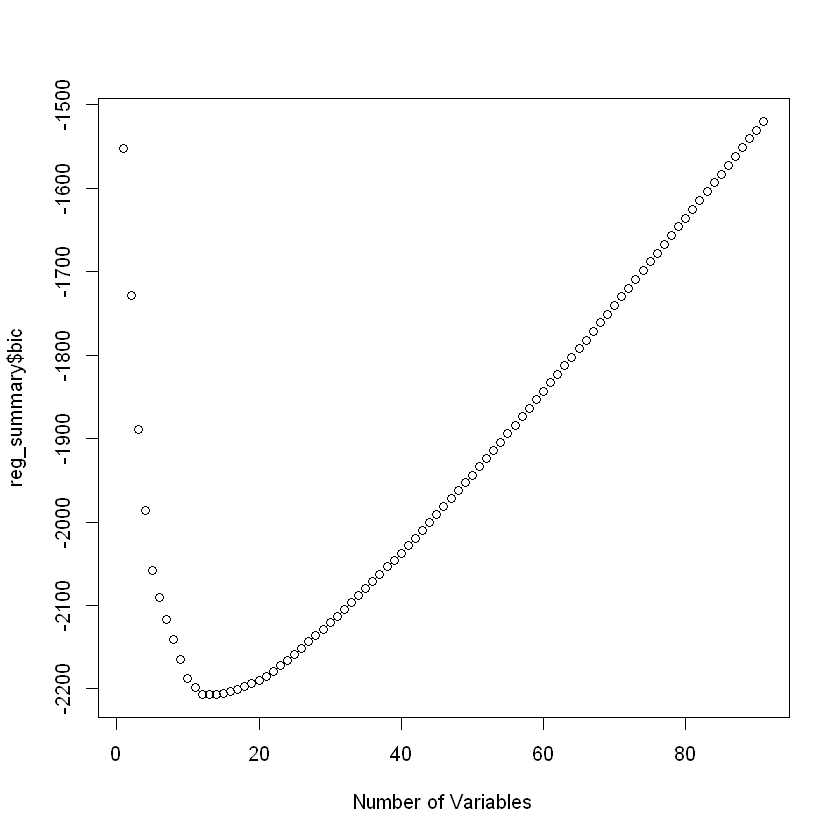

In [27]:
plot(reg_summary$bic,xlab="Number of Variables")

In [28]:
which.min(reg_summary$bic)

[1] 12

In [29]:
coef(reg_fwd, 12)

(Intercept)          int_rate        annual_inc    inq_last_6mths 
     1.076185e+00     -1.748769e-02      2.673307e-07     -1.581853e-02 
          pub_rec        revol_util emp_length.0_year     purpose.house 
    -4.370189e-02     -1.427757e-04      5.593666e-04     -6.257584e-03 
    addr_state.AK     addr_state.AR     addr_state.FL     addr_state.IL 
    -5.180475e-02      3.108949e-02     -3.712755e-02      1.398305e-02 
    addr_state.PA 
     2.161864e-02

#### Using the BIC measure, the linear relationship looks like - 
loan_status.Fully_Paid ~ int_rate + annual_inc + inq_last_6mths + pub_rec + revol_util + emp_length.0_year + purpose.house + addr_state.AK + addr_state.AR + addr_state.FL + addr_state.IL + addr_state.PA

In [30]:
set.seed(123)
ind <- sample(2, nrow(transformed_loans), replace=TRUE, prob=c(0.7,0.3))
train <- transformed_loans[ind==1,]
test <- transformed_loans[ind==2,]
logistic_mod <- glm(loan_status.Fully_Paid ~ int_rate + annual_inc + inq_last_6mths + pub_rec + revol_util + emp_length.0_year + purpose.house + addr_state.AK + addr_state.AR + addr_state.FL + addr_state.IL + addr_state.PA , data=train, family="binomial")
predicted_vals <- ifelse(predict(logistic_mod, test, type="response") > 0.5, 1 , 0)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [31]:
library(caret)
confusionMatrix(predicted_vals, test$loan_status, positive='1')

Warning message:
"package 'caret' was built under R version 3.4.3"Loading required package: lattice
Loading required package: ggplot2


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0    4    6
         1 1633 9764
                                          
               Accuracy : 0.8563          
                 95% CI : (0.8497, 0.8627)
    No Information Rate : 0.8565          
    P-Value [Acc > NIR] : 0.5279          
                                          
                  Kappa : 0.0031          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999386        
            Specificity : 0.002443        
         Pos Pred Value : 0.856717        
         Neg Pred Value : 0.400000        
             Prevalence : 0.856492        
         Detection Rate : 0.855966        
   Detection Prevalence : 0.999123        
      Balanced Accuracy : 0.500915        
                                          
       'Positive' Class : 1               
                                          

#### Insight:
As the profile of a conservative investor, we are solely looking to reduce losses. <br>
Therefore, the metric of interest here is specificity (true negative rate). <br>
Although the accuracy rate seems high (85.63%), the specificity is very bad (0.2%). <br>
The accuracy is almost equal to the no information rate. This looks like an imbalanced class problem. <br> 

In [32]:
table(transformed_loans$loan_status.Fully_Paid)


    0     1 
 5425 33236 

#### Dealing with class imbalance:

Using the undersampling strategy seems like a better idea due to the sample number of 'Charged Off' outcomes.

In [33]:
library(ROSE)

Warning message:
"package 'ROSE' was built under R version 3.4.3"Loaded ROSE 0.0-3



In [34]:
loans_undersampled <- ovun.sample(loan_status.Fully_Paid ~ int_rate + annual_inc + inq_last_6mths + pub_rec + revol_util + emp_length.0_year + purpose.house + addr_state.AK + addr_state.AR + addr_state.FL + addr_state.IL + addr_state.PA, data=transformed_loans,method='under', N=5425*2)$data
table(loans_undersampled$loan_status.Fully_Paid)


   0    1 
5425 5425 

In [35]:
set.seed(123)
ind <- sample(2, nrow(loans_undersampled), replace=TRUE, prob=c(0.7,0.3))
train <- loans_undersampled[ind==1,]
test <- loans_undersampled[ind==2,]
logistic_mod <- glm(loan_status.Fully_Paid ~ int_rate + annual_inc + inq_last_6mths + pub_rec + revol_util + emp_length.0_year + purpose.house + addr_state.AK + addr_state.AR + addr_state.FL + addr_state.IL + addr_state.PA , data=train, family="binomial")
predicted_vals <- ifelse(predict(logistic_mod, test, type="response") > 0.5, 1 , 0)
confusionMatrix(predicted_vals, test$loan_status.Fully_Paid, positive='1')

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 989 624
         1 594 990
                                          
               Accuracy : 0.619           
                 95% CI : (0.6019, 0.6359)
    No Information Rate : 0.5048          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.2381          
 Mcnemar's Test P-Value : 0.406           
                                          
            Sensitivity : 0.6134          
            Specificity : 0.6248          
         Pos Pred Value : 0.6250          
         Neg Pred Value : 0.6131          
             Prevalence : 0.5048          
         Detection Rate : 0.3097          
   Detection Prevalence : 0.4955          
      Balanced Accuracy : 0.6191          
                                          
       'Positive' Class : 1               
                                          

#### Insight:
Although the overall accuracy rate has decreased to 61.9% (higher than no information rate), the specificity has dramatically increased to 62.48%. 
Therefore, there seems to be an improvement over the previous model. 

#### Model 2: Decision Tree 

Using undersampled data:

In [36]:
loans_undersampled$loan_status.Fully_Paid <- as.factor(loans_undersampled$loan_status.Fully_Paid)
str(loans_undersampled$loan_status)

 Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


In [37]:
set.seed(123)
ind <- sample(2, nrow(loans_undersampled), replace=TRUE, prob=c(0.7,0.3))
train <- loans_undersampled[ind==1,]
test <- loans_undersampled[ind==2,]

In [38]:
library(tree)
tree_model <- tree(loan_status.Fully_Paid ~ ., data=train)
summary(tree_model)


Classification tree:
tree(formula = loan_status.Fully_Paid ~ ., data = train)
Variables actually used in tree construction:
[1] "int_rate"
Number of terminal nodes:  3 
Residual mean deviance:  1.315 = 10060 / 7650 
Misclassification error rate: 0.4052 = 3101 / 7653 

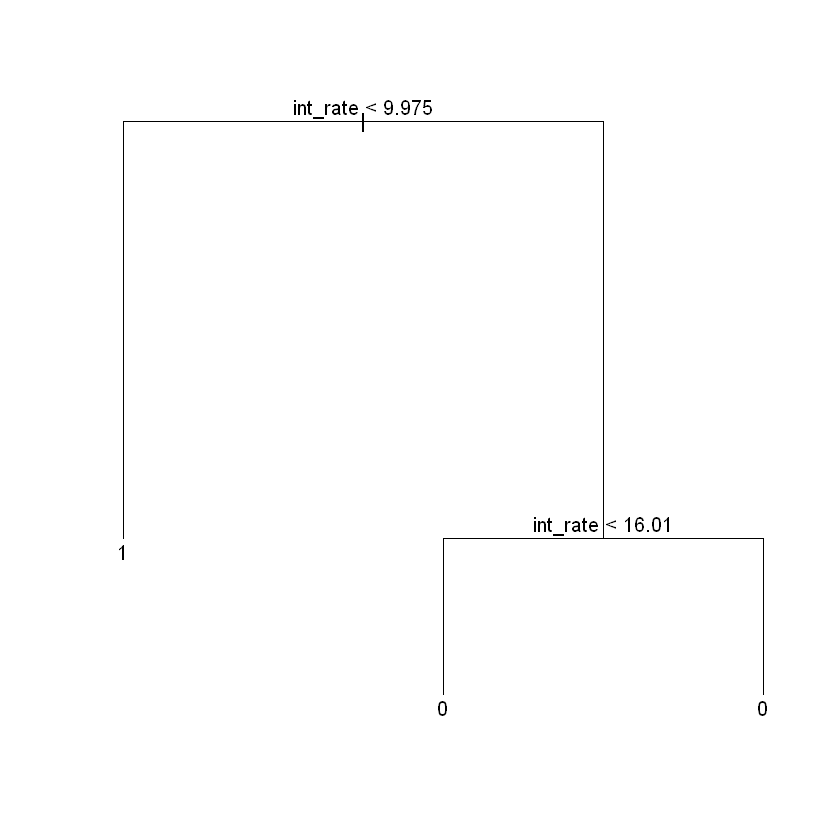

In [39]:
plot(tree_model)
text(tree_model, pretty=0)     

In [40]:
pred_labels = predict(tree_model, test, type="class")
head(pred_labels)

[1] 0 1 0 1 1 0
Levels: 0 1

In [41]:
confusionMatrix(pred_labels, test$loan_status, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1390 1130
         1  193  484
                                          
               Accuracy : 0.5862          
                 95% CI : (0.5689, 0.6033)
    No Information Rate : 0.5048          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1769          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.2999          
            Specificity : 0.8781          
         Pos Pred Value : 0.7149          
         Neg Pred Value : 0.5516          
             Prevalence : 0.5048          
         Detection Rate : 0.1514          
   Detection Prevalence : 0.2118          
      Balanced Accuracy : 0.5890          
                                          
       'Positive' Class : 1               
                                          

#### Insight:

The accuracy rate (58.62%) is a little better than the no information rate, but lower than the regression model. Our metric of interest (specificity) is extremely high at 87.81%. This seems like a better model than the logistic regression models.   

#### Model 3: k Nearest Neighbors

In [42]:
loans <- filtered_loan_stats

In [43]:
table(loans$loan_status)


Charged Off  Fully Paid 
       5425       33236 

#### Choosing k as the square root of minimum class frequency, normalizing and hot encoding the data:

In [44]:
k = 5425 ** (1/2)
k

[1] 73.6546

In [45]:
data_norm <- function(x){     
    normalized_val = (x - min(x)) / (max(x) - min(x))
    return(normalized_val)
}

In [46]:
factor_cols <- sapply(loans, is.factor)
numeric_cols <- !factor_cols

In [47]:
loans[numeric_cols] <- sapply(loans[numeric_cols], data_norm)
summary(loans)

   loan_amnt              term          int_rate       installment    
 Min.   :0.0000    36 months:28243   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1457    60 months:10418   1st Qu.:0.2034   1st Qu.:0.1185  
 Median :0.2754                      Median :0.3359   Median :0.2075  
 Mean   :0.3134                      Mean   :0.3461   Mean   :0.2415  
 3rd Qu.:0.4203                      3rd Qu.:0.4784   3rd Qu.:0.3252  
 Max.   :1.0000                      Max.   :1.0000   Max.   :1.0000  
                                                                      
     emp_length    home_ownership    annual_inc            verification_status
 10+ years:8898   MORTGAGE:17246   Min.   :0.000000   Not Verified   :16474   
 < 1 year :4578   NONE    :    3   1st Qu.:0.006255   Source Verified: 9808   
 2 years  :4389   OTHER   :   96   Median :0.009340   Verified       :12379   
 3 years  :4094   OWN     : 2840   Mean   :0.010948                           
 4 years  :3437   RENT    :18476   3r

In [48]:
loans$loan_status <- sapply(loans$loan_status, function(x) ifelse(x == 'Fully Paid', 'FP', 'CO'))
loans$loan_status <- as.factor(loans$loan_status)
str(loans$loan_status)

 Factor w/ 2 levels "CO","FP": 2 1 2 2 2 2 2 2 1 1 ...


In [49]:
factor_dummy_cols <- acm.disjonctif(loans[factor_cols])
str(factor_dummy_cols)

'data.frame':	38661 obs. of  88 variables:
 $ term. 36 months                    : num  1 0 1 1 0 1 0 1 0 0 ...
 $ term. 60 months                    : num  0 1 0 0 1 0 1 0 1 1 ...
 $ emp_length.< 1 year                : num  0 1 0 0 0 0 0 0 0 1 ...
 $ emp_length.1 year                  : num  0 0 0 0 1 0 0 0 0 0 ...
 $ emp_length.10+ years               : num  1 0 1 1 0 0 0 0 0 0 ...
 $ emp_length.2 years                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ emp_length.3 years                 : num  0 0 0 0 0 1 0 0 0 0 ...
 $ emp_length.4 years                 : num  0 0 0 0 0 0 0 0 1 0 ...
 $ emp_length.5 years                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ emp_length.6 years                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ emp_length.7 years                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ emp_length.8 years                 : num  0 0 0 0 0 0 1 0 0 0 ...
 $ emp_length.9 years                 : num  0 0 0 0 0 0 0 1 0 0 ...
 $ emp_length.n/a                     : num  0 0 0 0 0 0 0 0

In [50]:
factor_dummy_cols <- subset(factor_dummy_cols, select=-c(loan_status.CO))
transformed_loans <- loans[!factor_cols]
transformed_loans <- cbind(transformed_loans, factor_dummy_cols)
head(transformed_loans)

loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,addr_state.SD,addr_state.TN,addr_state.TX,addr_state.UT,addr_state.VA,addr_state.VT,addr_state.WA,addr_state.WI,addr_state.WV,addr_state.WY
0.13043478,0.2728221,0.11413726,0.003335557,0.92197399,0,0.125,0.02380952,0,0.09123727,...,0,0,0,0,0,0,0,0,0,0
0.05797101,0.5138237,0.03423032,0.004336224,0.03334445,0,0.625,0.02380952,0,0.01127764,...,0,0,0,0,0,0,0,0,0,0
0.05507246,0.5498174,0.05322993,0.001376251,0.29076359,0,0.250,0.00000000,0,0.01976094,...,0,0,0,0,0,0,0,0,0,0
0.27536232,0.4209703,0.25096549,0.007538359,0.66688896,0,0.125,0.19047619,0,0.03742279,...,0,0,0,0,0,0,0,0,0,0
0.07246377,0.3792384,0.04040326,0.012675117,0.59819940,0,0.000,0.30952381,0,0.18573014,...,0,0,0,0,0,0,0,0,0,0
0.13043478,0.1293688,0.10916634,0.005336891,0.37345782,0,0.375,0.16666667,0,0.05323288,...,0,0,0,0,0,0,0,0,0,0


In [51]:
str(transformed_loans)

'data.frame':	38661 obs. of  99 variables:
 $ loan_amnt                          : num  0.1304 0.058 0.0551 0.2754 0.0725 ...
 $ int_rate                           : num  0.273 0.514 0.55 0.421 0.379 ...
 $ installment                        : num  0.1141 0.0342 0.0532 0.251 0.0404 ...
 $ annual_inc                         : num  0.00334 0.00434 0.00138 0.00754 0.01268 ...
 $ dti                                : num  0.922 0.0333 0.2908 0.6669 0.5982 ...
 $ delinq_2yrs                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ inq_last_6mths                     : num  0.125 0.625 0.25 0.125 0 0.375 0.125 0.25 0.25 0 ...
 $ open_acc                           : num  0.0238 0.0238 0 0.1905 0.3095 ...
 $ pub_rec                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ revol_bal                          : num  0.0912 0.0113 0.0198 0.0374 0.1857 ...
 $ revol_util                         : num  0.8378 0.0941 0.986 0.2102 0.5395 ...
 $ total_acc                          : num  0.0795 0.0227 

In [52]:
library(class)
set.seed(123)
ind <- sample(2, nrow(transformed_loans), replace=TRUE, prob=c(0.7,0.3))
train <- transformed_loans[ind==1,]
test <- transformed_loans[ind==2,]
predicted_labels <- knn(train, test, train$loan_status.FP, k=74)
confusionMatrix(predicted_labels, test$loan_status, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  729    0
         1  908 9770
                                          
               Accuracy : 0.9204          
                 95% CI : (0.9153, 0.9253)
    No Information Rate : 0.8565          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.579           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.4453          
         Pos Pred Value : 0.9150          
         Neg Pred Value : 1.0000          
             Prevalence : 0.8565          
         Detection Rate : 0.8565          
   Detection Prevalence : 0.9361          
      Balanced Accuracy : 0.7227          
                                          
       'Positive' Class : 1               
                                          

#### Insight:
The accuracy rate (92.04%) is higher than no information rate. The specificity is 44.53%, which is lower than our decision tree model. 

###  Verdict:

Comparing the three models: 

In [53]:
accuracy_rate = c(0.8563, 0.619, 0.5862,0.9204)
specificity_rate = c(0.0023, 0.6248, 0.8781,0.4453)
model_name =c('Logistic Regression (imbalanced)', 'Logistic Regression (balanced)', 'Decision Tree', 'kNN')
data.frame(Model_Name=model_name, Accuracy_Rate = accuracy_rate, Specificity_Rate = specificity_rate)

Model_Name,Accuracy_Rate,Specificity_Rate
Logistic Regression (imbalanced),0.8563,0.0023
Logistic Regression (balanced),0.6190,0.6248
Decision Tree,0.5862,0.8781
kNN,0.9204,0.4453


#### Assessing the tradeoffs, decision tree model seems to be the best for the problem at hand. 